In [1]:
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import random as rd

In [2]:
def ffgn(st,T):
    B=2
    a=6
    N=30
    n=np.arange(1,N+1,1,dtype=float)
    u=a*B**(-n)   #u(n)
    r=np.e**(-u)   #r(n)
    W=np.sqrt((12*(1-r**2)*(B**(0.5-st)-B**(st-0.5))*((a*B**(-n))**(1-2*st)))/np.random.gamma(2-2*st))
    uu_noise=np.random.uniform(0,1,[N,T])
    X=np.zeros((N,T))
    et=np.zeros(T)
    b=0
    for nx in range(N):             #main loop for FFGN
        X[nx,0]=(uu_noise[nx,0]-0.5)/(1-r[nx]**2)**0.5
        for t in range(T):
            X[nx,t]=r[nx]*X[nx,t-1]+(uu_noise[nx,t]-0.5)

    for t in range(T):
        for nx in range(N):
            b += X[nx,t]* W[nx]
        et[t]=b
        if et[t]<0:
            et[t]=0
        elif et[t]>=0:
            et[t]=1
        b=0

    return et

In [350]:
   a = rd.randint(0,1)

In [351]:
a

0

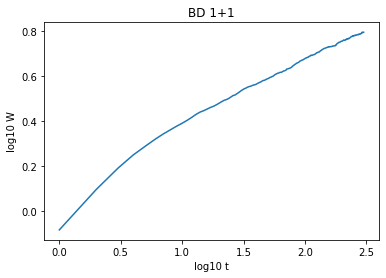

In [11]:
#计算BD的标度指数双对数图
L = 512        #模拟尺寸
T = 300         #模拟时间
re = 1000       #重复次数
W = np.zeros(T) #粗糙度
A=ffgn(0,T)     #长程关联噪声
from random import randrange

for times in range(re):
    h = np.zeros(L+2, dtype=int)#上一时刻
    h1 = h
    w = np.array([])
    for t in range(T):
        h[0]=h[L]
        h[L+1]=h[1]
        for i in range(1,L+1):      #按层沉积
            j = randrange(1,L+1)        # Select a random site
            a = rd.randint(0,1)
            h1[j] = max(h[j-1], h[j]+a, h[j+1])
        wt = np.std(h1)
        w = np.append(w, wt)
        h = h1
    W=W+w
        
W = W/re
xlog = np.log10 (np.arange(1, T+1))
ylog = np.log10 (W)

plt.plot (xlog, ylog,label='original data')
plt.title('BD 1+1')  
plt.ylabel("log10 W")
plt.xlabel("log10 t")
plt.show()

In [206]:
A

array([0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.])

In [44]:
xlog1=xlog[1:300]
ylog1=ylog[1:300]

β = 0.2886148700845448


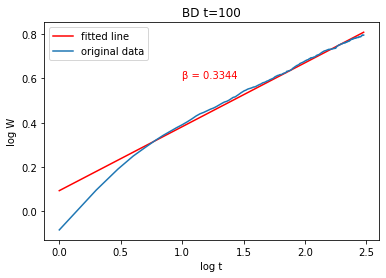

In [12]:
res = stats.linregress(xlog, ylog)
x=np.array(xlog)
plt.plot(x, res.intercept + res.slope*x, color='r', label='fitted line',)
plt.annotate("β = 0.3344",xy=(1,0.6),color='r')
print('β =',res.slope)        
plt.plot (xlog, ylog,label='original data')
plt.title('BD t=100')  

plt.ylabel("log W")
plt.xlabel("log t")
plt.legend()
    

In [39]:
len(h)

514

α = 0.502


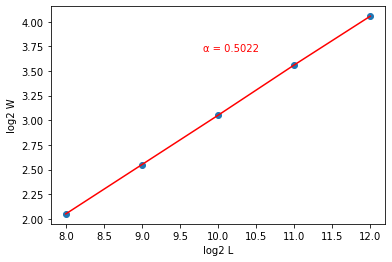

In [27]:
#计算粗糙度指数α
a=[8,9,10,11,12]
b=[2.05,2.55,3.05,3.56,4.055]
plt.scatter (a, b,label='original data')
res = stats.linregress(a, b)
print('α =',res.slope) 
plt.annotate("α = 0.5022",xy=(9.8,3.7),color='r')
plt.plot(a,b,c='red')
plt.ylabel("log2 W")
plt.xlabel("log2 L")
plt.show()

In [5]:
#对高度和粗糙度进行归一化
h1=(h-np.mean(h))/np.std(h)
h1_pdf=stats.norm.pdf(h1,loc=np.mean(h1), scale=np.std(h1))

W1=(W-np.mean(W))/np.std(W)
W1_pdf=stats.norm.pdf(W1,loc=np.mean(W1), scale=np.std(W1))


In [136]:
# Create a list or array with your data points 
data =h1
# Calculate the skewness 
skew = np.mean((data - np.mean(data)/np.std(data))**3)
# Calculate the kurtosis 
kurt = np.mean((data - np.mean(data)/np.std(data))**4)
print(skew,kurt)

-0.03638851589702958 2.4298311171348246


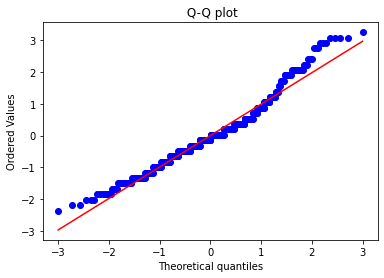

In [7]:
#Q-Q plot
from scipy import stats
stats.probplot(h1, dist="norm", plot=plt)
plt.title(" Q-Q plot")

plt.show()

/Users/zichen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


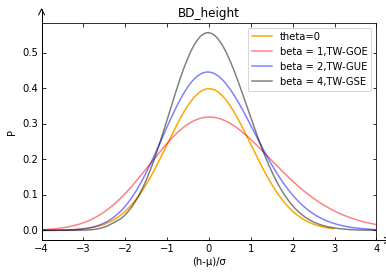

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import mpl_toolkits.axisartist as axisartist


fig = plt.figure()

ax = axisartist.Subplot(fig,111)

fig.add_axes(ax)
# 坐标轴加上方向箭头
ax.axis["bottom"].set_axisline_style("->", size = 1.5)
ax.axis["left"].set_axisline_style("->", size = 1.5)

# 模拟高度分布和粗糙度分布的核心代码，seaborn.distplot()用于绘制直方图、概率密度/核密度曲线、拟合曲线。
plot=sns.distplot(h1,hist=False,kde=False, fit=stats.norm, fit_kws={'color':'orange', 'label':'theta=0','linestyle':'-'})
plt.plot(x,pdf1, color = "red", alpha = 0.5, label=r"beta = 1,TW-GOE")
plt.plot(x,pdf2, color = "blue", alpha = 0.5, label=r"beta = 2,TW-GUE")
plt.plot(x,pdf4, color = "black", alpha = 0.5, label=r"beta = 4,TW-GSE")
plt.title('BD_height')  
plt.xlim(-4,4)
plt.ylabel("P")
plt.xlabel("(h-μ)/σ")
plt.legend()
plt.show()

/Users/zichen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


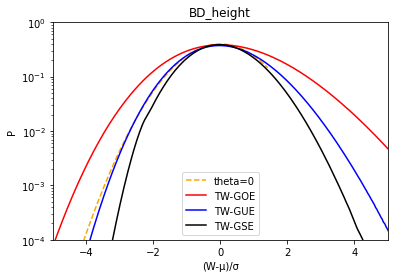

In [37]:
plt.axes(yscale = "log")
plot=sns.distplot(W1,hist=False,kde=False, fit=stats.norm, fit_kws={'color':'orange', 'label':'theta=0','linestyle':'--'})
plt.plot(x,pdf1*1.21, color = "red", alpha = 1, label=r"TW-GOE")
plt.plot(x,pdf2*0.84, color = "blue", alpha = 1, label=r"TW-GUE")
plt.plot(x,pdf4*0.7, color = "black", alpha = 1, label=r"TW-GSE")
plt.title('BD_height')  
plt.ylabel("P")
plt.ylim(1/10000,1)
plt.xlim(-5,5)
plt.xlabel("(W-μ)/σ")
plt.legend()
plt.show()

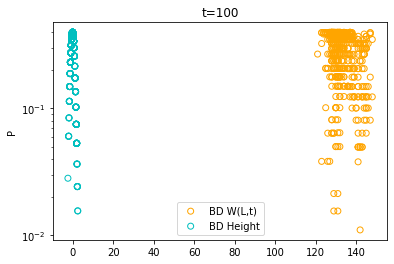

In [144]:
plt.axes(yscale = "log")
plt.scatter(h1,h1_pdf,c = 'none', edgecolors= 'orange', alpha = 1 ,label=r"BD W(L,t)")
plt.scatter(h2,h2_pdf,c = 'none', edgecolors= 'c', alpha = 1 ,label=r"BD Height")

plt.title('t=100')  
plt.ylabel("P")
plt.ylim(1/1000,1)
plt.xlim(-4,4)
plt.xlabel("")
plt.legend()
plt.show()

In [89]:
from TracyWidom import TracyWidom
x = np.linspace(-10,10,L)
x1 = np.linspace(-10, 7.2, L)
x2 = np.linspace(-10, 6.3, L)
x4 = np.linspace(-10, 5.3, L)
tw1 = TracyWidom(beta=1)  # allowed beta values are 1, 2, and 4
tw2 = TracyWidom(beta=2)
tw4 = TracyWidom(beta=4)



r = np.random.rand(1000)
tw1_sample = tw1.cdfinv(r)

In [90]:
pdf1 = tw1.pdf(x1)
pdf2 = tw2.pdf(x2)
pdf4 = tw4.pdf(x4)
PDF1=np.log10(pdf1)
PDF2=np.log10(pdf2)
PDF4=np.log10(pdf4)

<ipython-input-90-ea8f3aa7192d>:6: RuntimeWarning: invalid value encountered in log10
  PDF4=np.log10(pdf4)


In [16]:
#对TW进行归一
def normalize(data):
    a1=np.mean(data)
    a2=np.std(data)
    a3 = (data-np.mean(data))/np.std(data)
    return a3    

In [93]:
pdf1=normalize(pdf1)
pdf2=normalize(pdf2)
pdf4=normalize(pdf4)

In [61]:

# Create a list or array with your data points 
data = h1
# Calculate the skewness 
skew = np.mean((data - np.mean(data))**3)/np.std(data)**3 
# Calculate the kurtosis 
kurt = np.mean((data - np.mean(data))**4)/np.std(data)**4  
print(skew,kurt)

0.11470055651175763 2.316947252882235


In [62]:
theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, 100))

RSOS和BD对比

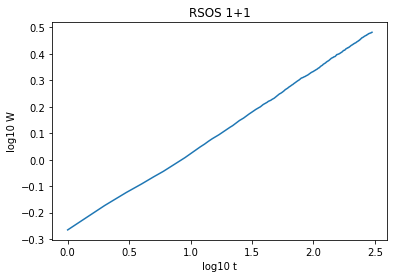

In [110]:
#计算RSOS标度指数双对数图
L = 512        #模拟尺寸
T = 300         #模拟时间
re = 100       #重复次数
W = np.zeros(T) #粗糙度
A=ffgn(0,T)     #长程关联噪声
S=1
from random import randrange

for times in range(re):
    h = np.zeros(L+2, dtype=int)#上一时刻
    h2 = h
    w = np.array([])
    for t in range(T):
        h[0]=h[L]
        h[L+1]=h[1]
        for i in range(1,L+1):      #按层沉积
            j = randrange(1,L+1)        # Select a random site
            a=rd.randint(0,1)
            if ((np.fabs(h[j] - h[(j-1)]) <= S) and (np.fabs((h[j] + 1) - h[(j+1)]) <= S)):
                    h2[j] += a
        h = h2
        wt = np.std(h2)
        w = np.append(w, wt)
    W=W+w
        
W = W/re
xlog = np.log10 (np.arange(1, T+1))
ylog = np.log10 (W)

plt.plot (xlog, ylog,label='original data')
plt.title('RSOS 1+1')  
plt.ylabel("log10 W")
plt.xlabel("log10 t")
plt.show()

In [305]:
xlog1=xlog[10:300]
ylog1=ylog[10:300]

β = 0.3090292609912798


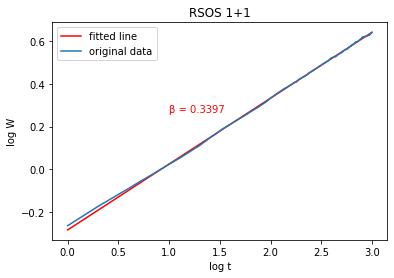

In [71]:
res = stats.linregress(xlog, ylog)
x=np.array(xlog)
plt.plot(x, res.intercept + res.slope*x, color='r', label='fitted line',)
plt.annotate("β = 0.3297",xy=(1,0.27),color='r')
print('β =',res.slope)        
plt.plot (xlog, ylog,label='original data')
plt.title('RSOS 1+1')  

plt.ylabel("log W")
plt.xlabel("log t")
plt.legend()
    

In [111]:
#对高度和粗糙度进行归一化
h3=(h-np.mean(h))/np.std(h)
h3_pdf=stats.norm.pdf(h2,loc=np.mean(h2), scale=np.std(h2))

W2=(W-np.mean(W))/np.std(W)
W2_pdf=stats.norm.pdf(W2,loc=np.mean(W2), scale=np.std(W2))


In [77]:

# Create a list or array with your data points 
data = W2
# Calculate the skewness 
skew = np.mean((data - np.mean(data))**3)/np.std(data)**3 
# Calculate the kurtosis 
kurt = np.mean((data - np.mean(data))**4)/np.std(data)**4  
print(skew,kurt)

-0.9080350753539597 3.1922745570148536


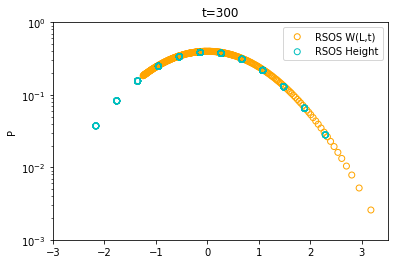

In [117]:
plt.axes(yscale = "log")
plt.scatter(W2,W2_pdf,c = 'none', edgecolors= 'orange', alpha = 1 ,label=r"RSOS W(L,t)")
plt.scatter(h3,h3_pdf,c = 'none', edgecolors= 'c', alpha = 1 ,label=r"RSOS Height")

plt.title('t=300')  
plt.ylabel("P")
plt.ylim(1/1000,1)
plt.xlim(-3,3.5)
plt.xlabel("")
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1000,) and (256,)

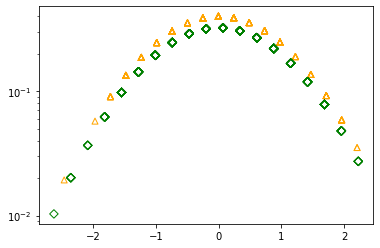

In [73]:
#高度分布对比散点图的绘制
plt.axes(yscale = "log")
plt.scatter(h1,h1_pdf, c = 'none', edgecolors= 'orange', alpha = 1, marker='^',label=r"BD t=250")
plt.scatter(h3,h3_pdf*3, c = 'none', edgecolors= 'green', alpha = 1, marker='D',label=r"RSOS t=250")
plt.plot(x,pdf1*1.21, color = "red", alpha = 1, label=r"TW-GOE")
plt.plot(x,pdf2*0.84, color = "blue", alpha = 1, label=r"TW-GUE")
plt.plot(x,pdf4*0.7, color = "black", alpha = 1, label=r"TW-GSE")
plt.title('Height')  
plt.ylabel("P")
plt.ylim(1/1000,1)
plt.xlim(-5,5)
plt.xlabel("(H-μ)/σ")
plt.legend()
plt.show()

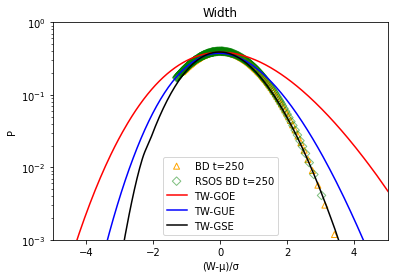

In [411]:
plt.axes(yscale = "log")
plt.scatter(-W1,W1_pdf, c = 'none', edgecolors= 'orange', alpha = 1, marker='^',label=r"BD t=250")
plt.scatter(-W2,W2_pdf, c = 'none', edgecolors= 'green', alpha = 0.5, marker='D',label=r"RSOS BD t=250")
plt.plot(x,pdf1*1.21, color = "red", alpha = 1, label=r"TW-GOE")
plt.plot(x,pdf2*0.84, color = "blue", alpha = 1, label=r"TW-GUE")
plt.plot(x,pdf4*0.7, color = "black", alpha = 1, label=r"TW-GSE")
plt.title('Width')  
plt.ylabel("P")
plt.ylim(1/1000,1)
plt.xlim(-5,5)
plt.xlabel("(W-μ)/σ")
plt.legend()
plt.show()